<a href="https://colab.research.google.com/github/sudhav2024/Machine-Learning/blob/main/MINI_PROJECT_C02_EMMISION_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving CO2_Emmision.csv to CO2_Emmision.csv
 Dataset Loaded Successfully!

   Year       State  CO2_Emission_Rate  Temperature_Change Climate_Type  \
0  1970  Tamil Nadu          14.733620           -0.831228     Tropical   
1  1971  Tamil Nadu          14.135540            0.201308     Tropical   
2  1972  Tamil Nadu          14.182242           -0.950097     Tropical   
3  1973  Tamil Nadu          15.076188           -1.170284     Tropical   
4  1974  Tamil Nadu          15.719823           -1.137312     Tropical   

   Energy_Consumption  Population  Forest_Cover  Industrial_Output  \
0         2195.993345  33165000.0     31.201013          57.714774   
1         3890.968974  31155000.0     30.308443          51.664652   
2         3893.709608  12060000.0     32.447050          84.855531   
3         2719.608292  37185000.0     31.339571          56.662931   
4         3595.806104  13065000.0     30.692559          99.464024   

   Agricultural_Activity  Urbanization     Rainfall  

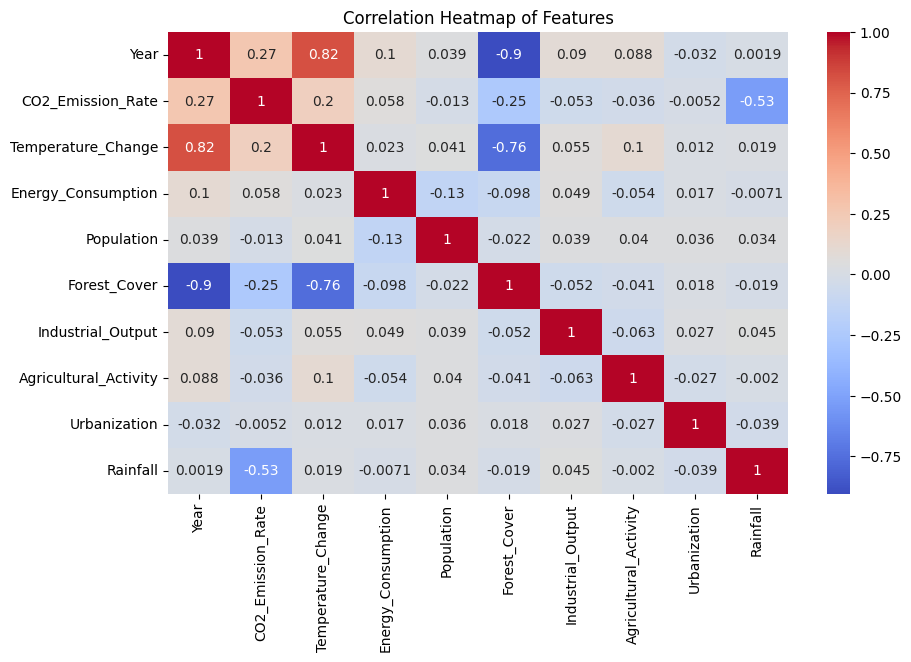


 Model Coefficients:
Intercept: 74.7245
Energy_Consumption: 0.0002
Population: 0.0000
Industrial_Output: -0.0093
Forest_Cover: -1.3743
Agricultural_Activity: -0.0097
Urbanization: -0.0007
Rainfall: -0.0064

 Model Performance:
R² Score: 0.3562
Mean Squared Error: 15.4003


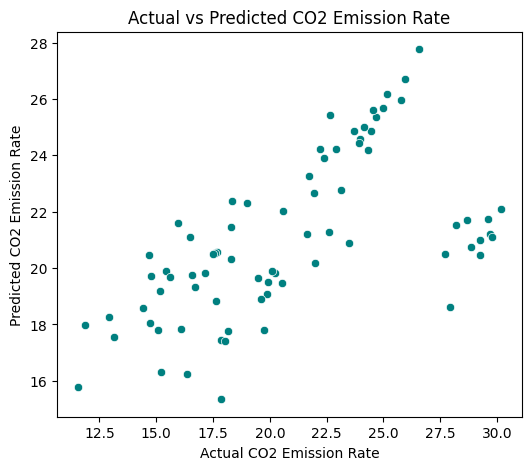

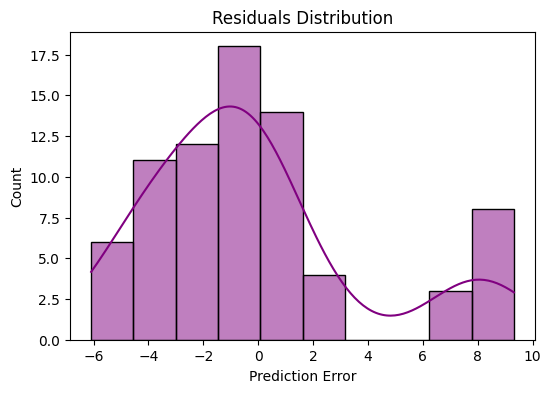


 Predicted CO2 Emission Rate for given input: 20.10


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from google.colab import files
import io


uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[file_name]))


print(" Dataset Loaded Successfully!\n")
print(df.head())
print("\nDataset Info:\n")
print(df.info())


df = df.dropna()
print(f"\nAfter removing missing values, dataset shape: {df.shape}")


X = df[['Energy_Consumption', 'Population', 'Industrial_Output',
        'Forest_Cover', 'Agricultural_Activity', 'Urbanization', 'Rainfall']]
y = df['CO2_Emission_Rate']


plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Features")
plt.show()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


print("\n Model Coefficients:")
print(f"Intercept: {model.intercept_:.4f}")
for name, coef in zip(X.columns, model.coef_):
    print(f"{name}: {coef:.4f}")


y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"\n Model Performance:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

plt.figure(figsize=(6,5))
sns.scatterplot(x=y_test, y=y_pred, color='teal')
plt.xlabel("Actual CO2 Emission Rate")
plt.ylabel("Predicted CO2 Emission Rate")
plt.title("Actual vs Predicted CO2 Emission Rate")
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True, color='purple')
plt.title("Residuals Distribution")
plt.xlabel("Prediction Error")
plt.show()

sample_input = np.array([[4000, 35000000, 80, 30, 60, 50, 2000]])  # Example input
predicted = model.predict(sample_input)
print(f"\n Predicted CO2 Emission Rate for given input: {predicted[0]:.2f}")
